In [1]:
class Point:  # класс представляет собой пространство имен, в котором записы свойства и методы, которые вместе являются атрибутами
    MAX_COORD = 100  # свойства
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):  # методы
        self.x = x
        self.y = y

In [2]:
pt1 = Point(1, 2)
pt2 = Point(3, 4)

Создавая экземпляры класса, то все атрибуты остаются в пространстве имен класса и копируются в отдельные экземпляры. Атрибуты класса являются общими для всех его экземпляров, при этом из экземпляров мы можем обращаться к атрибутам класса, так как пространства имен экземпляров содержат ссылку на внешнее пространтсва имен(класса).

Если какой-либо атрибут не существует в пространстве экземпляра, то поиск переходит во внешнее пространство, то есть в класс.

In [3]:
pt1.MAX_COORD

100

Обращаемся к атрибутам класса внутри методов:

In [4]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
#       if Point.MIN_COORD <= x <= Point.MAX_COORD:
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y

Как видно, мы можем обратиться либо через экземпляр(self), либо через сам класс(Point), явно указав пространство имен.

Допустим, что нам нужен метод, который бы изменял значение атрибута MIN_COORD

In [5]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def set_bound(self, left):
        self.MIN_COORD = left

Когда мы через self обращаемся к атрибуту и записываем ему новое значение через оператор присваивания, то он создает соответствующий атрибут в локальном пространстве имен(экземпляра). 

In [6]:
pt1 = Point(1, 2)

In [7]:
pt1.set_bound(-100)
pt1.__dict__

{'x': 1, 'y': 2, 'MIN_COORD': -100}

In [8]:
Point.__dict__

mappingproxy({'__module__': '__main__',
              'MAX_COORD': 100,
              'MIN_COORD': 0,
              '__init__': <function __main__.Point.__init__(self, x, y)>,
              'set_coord': <function __main__.Point.set_coord(self, x, y)>,
              'set_bound': <function __main__.Point.set_bound(self, left)>,
              '__dict__': <attribute '__dict__' of 'Point' objects>,
              '__weakref__': <attribute '__weakref__' of 'Point' objects>,
              '__doc__': None})

Таким образом правильным способом обратиться и изменить атрибут класса из экземпляра будет следующий:

In [10]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    @classmethod        
    def set_bound(cls, left):
        cls.MIN_COORD = left

In [12]:
pt1 = Point(1, 2)
pt1.set_bound(-100)
pt1.__dict__, Point.__dict__

({'x': 1, 'y': 2},
 mappingproxy({'__module__': '__main__',
               'MAX_COORD': 100,
               'MIN_COORD': -100,
               '__init__': <function __main__.Point.__init__(self, x, y)>,
               'set_coord': <function __main__.Point.set_coord(self, x, y)>,
               'set_bound': <classmethod at 0x7f68898fda90>,
               '__dict__': <attribute '__dict__' of 'Point' objects>,
               '__weakref__': <attribute '__weakref__' of 'Point' objects>,
               '__doc__': None}))

<h2> Магические методы для работы с атрибутами </h2>

* __ setattr __ (self, key, value) - автоматически вызывается при изменении свойства key класса;

* __ getattribute __ (self, item) - автоматически вызывается при получении свойства класса с именем item;

* __ getattr __ (self, item) - автоматически вызывается при получении несуществующего свойсвта item класса;

* __ delattr __ (self, item) - автоматически вызывается при удалении свойства item(не важно существует оно или нет);

In [16]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def __getattribute__(self, item):
        print('__getattribute__')  # строчка, которая нам говорит, что данный метод был вызван
        return object.__getattribute__(self, item)

__ getattribute __ - автоматически вызывается, когда идет считывание через экземпляр класса.

In [17]:
pt1 = Point(1, 2)
pt2 = Point(10, 20)

In [18]:
pt1.x

__getattribute__


1

In [20]:
a = pt1.x

__getattribute__


Таким образом, как только идет обращение к какому-либо атрибуту через экземпляр класса, то срабатывает магический метод __ getattribute __

In [21]:
a

1

In [22]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def __getattribute__(self, item):
        if item == 'x':
            raise ValueError('Доступ запрещён!')
        else:
            return object.__getattribute__(self, item)

In [23]:
pt1 = Point(1, 2)
pt1.x

ValueError: Доступ запрещён!

In [24]:
pt1.y

2

__ setattr __ - автоматически вызывается каждый раз, когда идет присвоение атрибуту какого либо значения.

In [28]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def __getattribute__(self, item):
        if item == 'x':
            raise ValueError('Доступ запрещён!')
        else:
            return object.__getattribute__(self, item)
        
    def __setattr__(self, key, value):
        print('__setattr__')
        object.__setattr__(self, key, value)

In [29]:
pt1 = Point(1, 2)
pt2 = Point(10, 20)

__setattr__
__setattr__
__setattr__
__setattr__


In [31]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def __getattribute__(self, item):
        if item == 'x':
            raise ValueError('Доступ запрещён!')
        else:
            return object.__getattribute__(self, item)
        
    def __setattr__(self, key, value):
        # можем запретить создавать какой-либо локальный атрибут в экземплярах класса.
        if key == 'z':
            raise AttributeError('Недопустимое имя атрибута.')
        else:
            # self.__dict__[key] = value
            object.__setattr__(self, key, value)

In [32]:
pt1 = Point(1, 2)
pt1.z = 3

AttributeError: Недопустимое имя атрибута.

__ getattr __ - вызывается автоматически каждый раз, когда идет обращение к несуществуещему атрибуту экземпляра класса

In [34]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def __getattribute__(self, item):
        if item == 'x':
            raise ValueError('Доступ запрещён!')
        else:
            return object.__getattribute__(self, item)
        
    def __setattr__(self, key, value):
        # можем запретить создавать какой-либо локальный атрибут в экземплярах класса.
        if key == 'z':
            raise AttributeError('Недопустимое имя атрибута.')
        else:
            # self.__dict__[key] = value
            object.__setattr__(self, key, value)
            
    def __getattr__(self, item):
        print('__getattr__' + item)

In [35]:
pt1 = Point(1, 2)

In [36]:
pt1.yy

__getattr__yy


In [37]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def __getattribute__(self, item):
        if item == 'x':
            raise ValueError('Доступ запрещён!')
        else:
            return object.__getattribute__(self, item)
        
    def __setattr__(self, key, value):
        # можем запретить создавать какой-либо локальный атрибут в экземплярах класса.
        if key == 'z':
            raise AttributeError('Недопустимое имя атрибута.')
        else:
            # self.__dict__[key] = value
            object.__setattr__(self, key, value)
            
    def __getattr__(self, item):
        return False

In [38]:
pt1 = Point(1, 2)

In [40]:
pt1.yy

False

__ delattr __ - вызывается всякий раз, когда удаляется какой-нибудь атрибут экземпляра класса

In [43]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def set_coord(self, x, y):
        if self.MIN_COORD <= x <= self.MAX_COORD:
            self.x = x
            self.y = y
            
    def __getattribute__(self, item):
        print('__getattribute__')
        if item == 'x':
            raise ValueError('Доступ запрещён!')
        else:
            return object.__getattribute__(self, item)
        
    def __setattr__(self, key, value):
        # можем запретить создавать какой-либо локальный атрибут в экземплярах класса.
        if key == 'z':
            raise AttributeError('Недопустимое имя атрибута.')
        else:
            # self.__dict__[key] = value
            object.__setattr__(self, key, value)
            
    def __getattr__(self, item):
        return False
    
    def __delattr__(self, item):
        print('__delattr__')
        return object.__delattr__(self, item)

In [44]:
pt1 = Point(1, 2)
del pt1.y
pt1.y

__delattr__


False

In [45]:
pt1.MAX_COORD

100

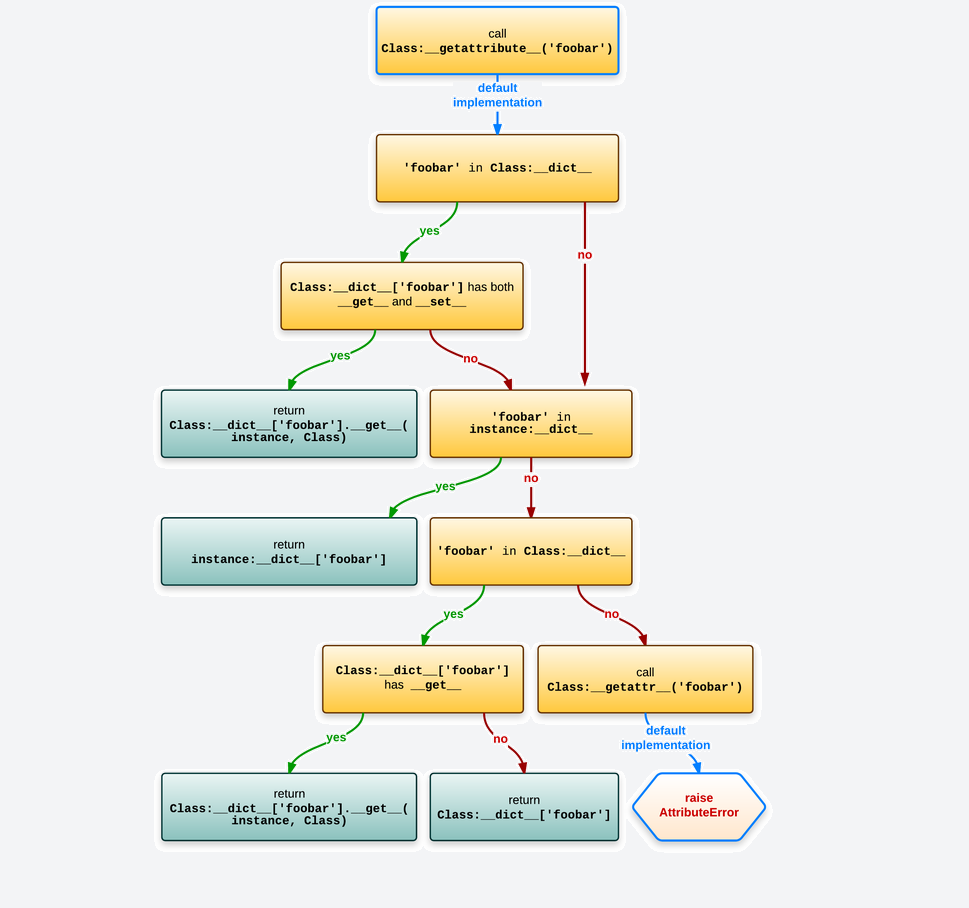

In [1]:
a = 1
if a == 1:
    print('a')
elif a > 0:
    print('a2')
else:
    print('a3')

a
